<a href="https://colab.research.google.com/github/HakimSkaik/Autonomous-Car/blob/main/Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import random


In [ ]:
np.random.seed(0)

In [ ]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()

In [ ]:
print(X_train.shape)
print(X_test.shape)
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
num_of_samples=[]
 
cols = 5
num_classes = 10

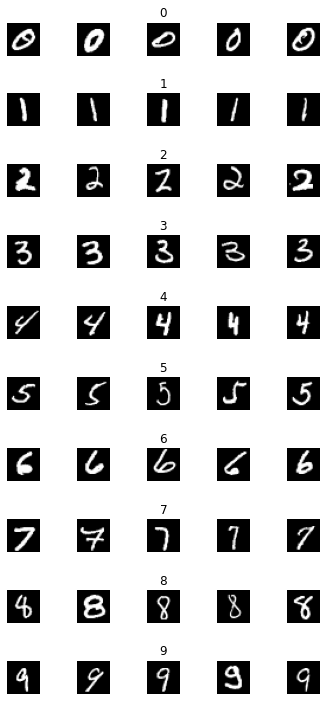

In [ ]:
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


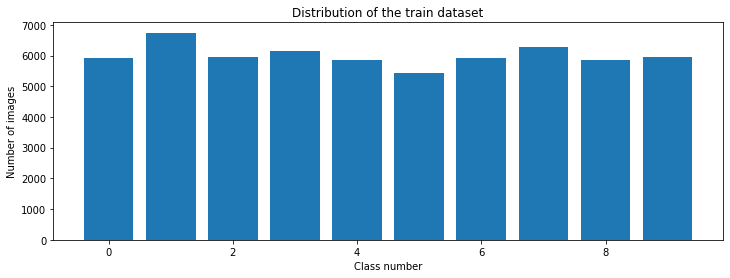

In [ ]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
def leNet_model():
  model = Sequential()
  model.add(Conv2D(30, (5,5), input_shape=(28, 28,1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15, (3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500, activation ='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model= leNet_model()
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 30)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 15)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 375)               0         
                                                                 
 dense_4 (Dense)             (None, 500)              

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=400, verbose=1, shuffle=1)

Epoch 1/10
135/135 [==============================] - 32s 232ms/step - loss: 0.2608 - accuracy: 0.9164 - val_loss: 0.0572 - val_accuracy: 0.9820
Epoch 2/10
135/135 [==============================] - 31s 231ms/step - loss: 0.0739 - accuracy: 0.9770 - val_loss: 0.0440 - val_accuracy: 0.9870
Epoch 3/10
135/135 [==============================] - 32s 241ms/step - loss: 0.0582 - accuracy: 0.9817 - val_loss: 0.0397 - val_accuracy: 0.9882
Epoch 4/10
135/135 [==============================] - 31s 230ms/step - loss: 0.0533 - accuracy: 0.9834 - val_loss: 0.0396 - val_accuracy: 0.9897
Epoch 5/10
135/135 [==============================] - 31s 230ms/step - loss: 0.0461 - accuracy: 0.9859 - val_loss: 0.0405 - val_accuracy: 0.9897
Epoch 6/10
135/135 [==============================] - 31s 230ms/step - loss: 0.0432 - accuracy: 0.9866 - val_loss: 0.0461 - val_accuracy: 0.9865
Epoch 7/10
135/135 [==============================] - 31s 229ms/step - loss: 0.0431 - accuracy: 0.9865 - val_loss: 0.0361 - val_ac

Text(0.5, 0, 'epoch')

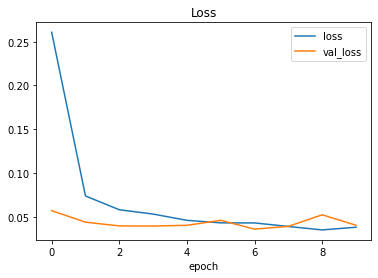

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title("Loss")
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

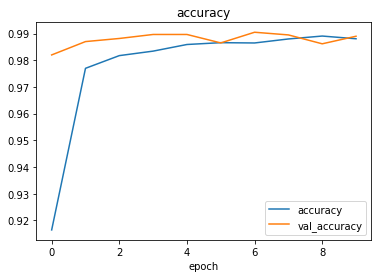

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title("accuracy")
plt.xlabel('epoch')

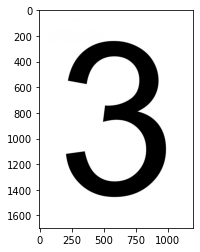

In [ ]:
import requests
from PIL import Image
url='https://printables.space/files/uploads/download-and-print/large-printable-numbers/3-a4-1200x1697.jpg'
response= requests.get(url, stream=True)
img= Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

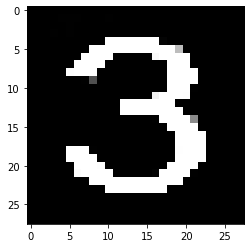

In [ ]:
import cv2
 
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [ ]:
img = img/255
img = img.reshape(1, 28,28,1)

In [ ]:
prediction = np.argmax(model.predict(img), axis =-1)

print("predicted digit:", str(prediction))

1/1 [==============================] - 0s 62ms/step
predicted digit: [3]


In [ ]:
score= model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test_accuracy:', score[1])

<class 'list'>
Test score: 0.0376642681658268
Test_accuracy: 0.9898999929428101


In [ ]:
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)

visual_layer1, visual_layer2= layer1.predict(img), layer2.predict(img)
print(visual_layer1.shape)
print(visual_layer2.shape)


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 67ms/step
(1, 24, 24, 30)
(1, 10, 10, 15)


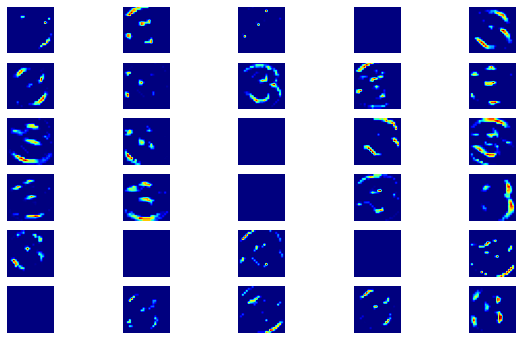

In [ ]:
plt.figure(figsize=(10, 6))
for i in range (30):
  plt.subplot(6, 5, i+1)
  plt.imshow(visual_layer1[0, :, :, i], cmap= plt.get_cmap('jet'))
  plt.axis('off')

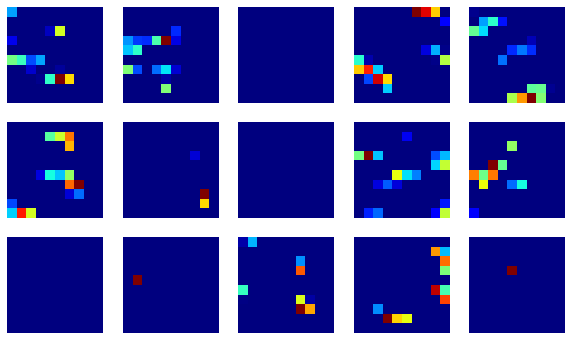

In [ ]:
plt.figure(figsize=(10, 6))
for i in range (15):
  plt.subplot(3, 5, i+1)
  plt.imshow(visual_layer2[0, :, :, i], cmap= plt.get_cmap('jet'))
  plt.axis('off')